<a href="https://colab.research.google.com/github/victorgmoreno/CatsNDogs_CNN/blob/main/CatsNDgos_CNN_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Desafio Prático de Machine Learning**
**Instituto CTS**

Problemas de classificação são uma aplicação bastante comum de algoritmos de aprendizagem de máquina, onde Redes Neurais tendem a se destacar sobretudo quando são utilizados dados não estruturados. Nesse tipo de problema, os exemplos são divididos em classes e cada classe é associada a um número inteiro. Nesse contexto, a função do classificador é associar cada exemplo de entrada à sua respectiva classe. Algumas tarefas de classificação são a identificação da presença de pessoas em uma imagem, a presença de anomalias em exames médicos ou ainda a identificação de componentes com defeito na linha de produção.


Nessa tarefa, espera-se a concepção de um modelo de Aprendizagem de Máquina capaz de classificar uma dada imagem quanto à presença de cães ou gatos. Para isso, será utilizado o banco de dados [Cats and Dogs Breeds Classification Oxford Dataset](https://www.kaggle.com/zippyz/cats-and-dogs-breeds-classification-oxford-dataset), que contém mais de 7 mil imagens de cães e gatos de raças diversas. Nesse banco de dados, as imagens de gatos têm seu nome iniciado com letra maiúscula (i.e. Abyssinian_34.jpg) e as imagens de cães têm o nome iniciado com letra minúscula (i.e. beagle_1.jpg). O banco de dados pode ser acessado a partir da plataforma Kaggle a partir do link acima.

**Atividades:**
1. Escreva um algoritmo em Python que realize o treinamento de um modelo
para a classificação de imagens quanto à presença de cães ou gatos.
2. Apesar de o dataset ser dividido em classes para cada raça de cão/gato,
só é necessário determinar se a imagem contém um cão ou um gato.
3. Use quantas imagens precisar, mas atente-se à divisão da própria base de
dados quanto aos conjuntos de treino e teste.
4. Atente-se a um código limpo, organizado, documentado e com ideias
claras da solução proposta.
5. Caso mais de um modelo seja produzido, comente sobre os resultados
obtidos, explicitando qual deles funcionou melhor e o porquê.
6. Na falta de uma GPU para o treinamento, recomenda-se o uso do Kaggle
ou do Google Colab.


**Instruções de entrega:**

● A entrega será feita por meio do site GitHub (você poderá utilizar a sua
conta pessoal ou criar uma nova no site).

● Você deverá “subir” as soluções para lá até a data especificada no e-mail
em que foi enviado esta prova.

● Você deverá enviar um e-mail (em resposta ao e-mail em que foi enviado a
prova para você) informando que já subiu a solução para o Github. Neste
e-mail você deve informar o endereço de acesso do seu repositório.

Obs: Uma vez finalizadas as atividades acima, encoraja-se o desenvolvimento de um modelo que também classifique as imagens quanto à raça. Considere cada raça como uma classe separada, independentemente de ser raça de cão ou gato.

Bibliografia Sugerida: François Chollet - Deep Learning with Python.

---


## **Resolução do desafio**

---

# **2. Importando as bibliotecas e pacotes que serão usadas no projeto**

Para resolução do problema de processamento digital de imagem e machine learning, é necessário importar certos pacotes. No problema, são usados:

In [1]:
# Importando as bibliotecas necessárias para dados, processamento e machine learning

import os, cv2, itertools #
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt 
import sklearn
%matplotlib inline

from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import warnings
import tqdm
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
import random

# **3. Fazendo download dos arquviso do dataset**

Agora, é necessário entrar no url do kaggle e baixar o dataset para o Google Colab. Além disso, o arquivo é compactado, portando precisa-se descompactá-lo para acessar cada imagem.

In [ ]:
# Procedimento para extração do dataset que está no kaggle

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Acessando a URL do kaggle para download
! kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

# Descompactando o dataset
! unzip cats-and-dogs-breeds-classification-oxford-dataset

Os arquivos foram todos extraídos. Podemos começar a organizar os dados.

# **4. Organizando os dados baixados**

Para evitar problemas de leitura das imagens durante o código, é preciso organizar todos os diretórios e arquivos. Além disso, nesse dataset existem alguns arquvios vazios, com mais de um canal ou com formato diferente do .jpg, assim é necessário haver uma filtragem.

In [ ]:
# Transformando os diretorios de cada imagem em uma lista de diretorios

imageDiretorio = os.listdir('/content/images/images')

# Alguns arquivos no dataset não estão no formato JPG, para sanar isso:



imageDiretorio = ([image for image in imageDiretorio if image.split('.')[-1] == 'jpg'])

print("A quantidade de diretórios de imagens acessados é:", len(imageDiretorio))

print('O formato do diretório das imagens é:')
print(imageDiretorio)
# Para começar a organizar os dados, precisa-se criar algumas variáveis globais

canais = 3
linhas = 128
colunas = 128
size = (linhas, colunas)

Fazendo a filtragem dos arquivos, é necessário classificar os gatos e cachorros de acordo com o diretório de cada imagem. 

*Imagens que começam com maiúsculo: Gatos (0)*

Exemplo: Abyssinian_34.jpg

*Imagens que começam com minúsculo: Cachorros (0)*

Exemplo: beagle_1.jpg

In [4]:
# Agora, separaremos as imagens de gatos e de cachorros para a máquina
gatosDiretorio = []
cachorrosDiretorio = []

for i in range(0, len(imageDiretorio)):
  if imageDiretorio[i][0].isupper():
    gatosDiretorio.append('/content/images/images/'+imageDiretorio[i])
  else:
    cachorrosDiretorio.append('/content/images/images/'+imageDiretorio[i])

Ao separar duas listas, uma com todos os gatos e outra com todos os cachorros, é necessário criar outra lista, contendo apenas zeros e uns.

Nessa terceira lista, o 0 representará gato e o 1 representará cachorro.

In [5]:
# GATO = 0; CACHORRO = 1
# Criando uma lista de apoio como se fosse uma matriz de identidade
ygatos = np.zeros(len(gatosDiretorio), dtype=int)
ycachorros = np.ones(len(cachorrosDiretorio), dtype=int)

# Agora, concatena-se os gatos e cachorros em um único array para treiná-los
input_path = gatosDiretorio+cachorrosDiretorio
label = np.concatenate((ygatos, ycachorros))
# GATOS = 0 E CACHORRO = 1

Para facilitar todo o processo de análise de dados, é importante criar um dataframe para se ter os dados de forma organizada. 

Criou-se duas colunas, uma com os dados de diretório de cada imagem, outra com os dados de identificação binária (gato ou cachorro).

In [7]:
# Agora vamos criar um dataframe df

df = pd.DataFrame()
df['images'] = input_path  # diretorio da imagem
df['label'] = label  # label, 0 = gato, 1 = cachorro
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0              /content/images/images/Persian_29.jpg      0
1             /content/images/images/keeshond_62.jpg      1
2               /content/images/images/Sphynx_77.jpg      0
3    /content/images/images/yorkshire_terrier_25.jpg      1
4  /content/images/images/miniature_pinscher_133.jpg      1

Agora, para exemplififcar que funcionou, mostramos alguns exemplos de imagens de cachorro detalhadamente.:

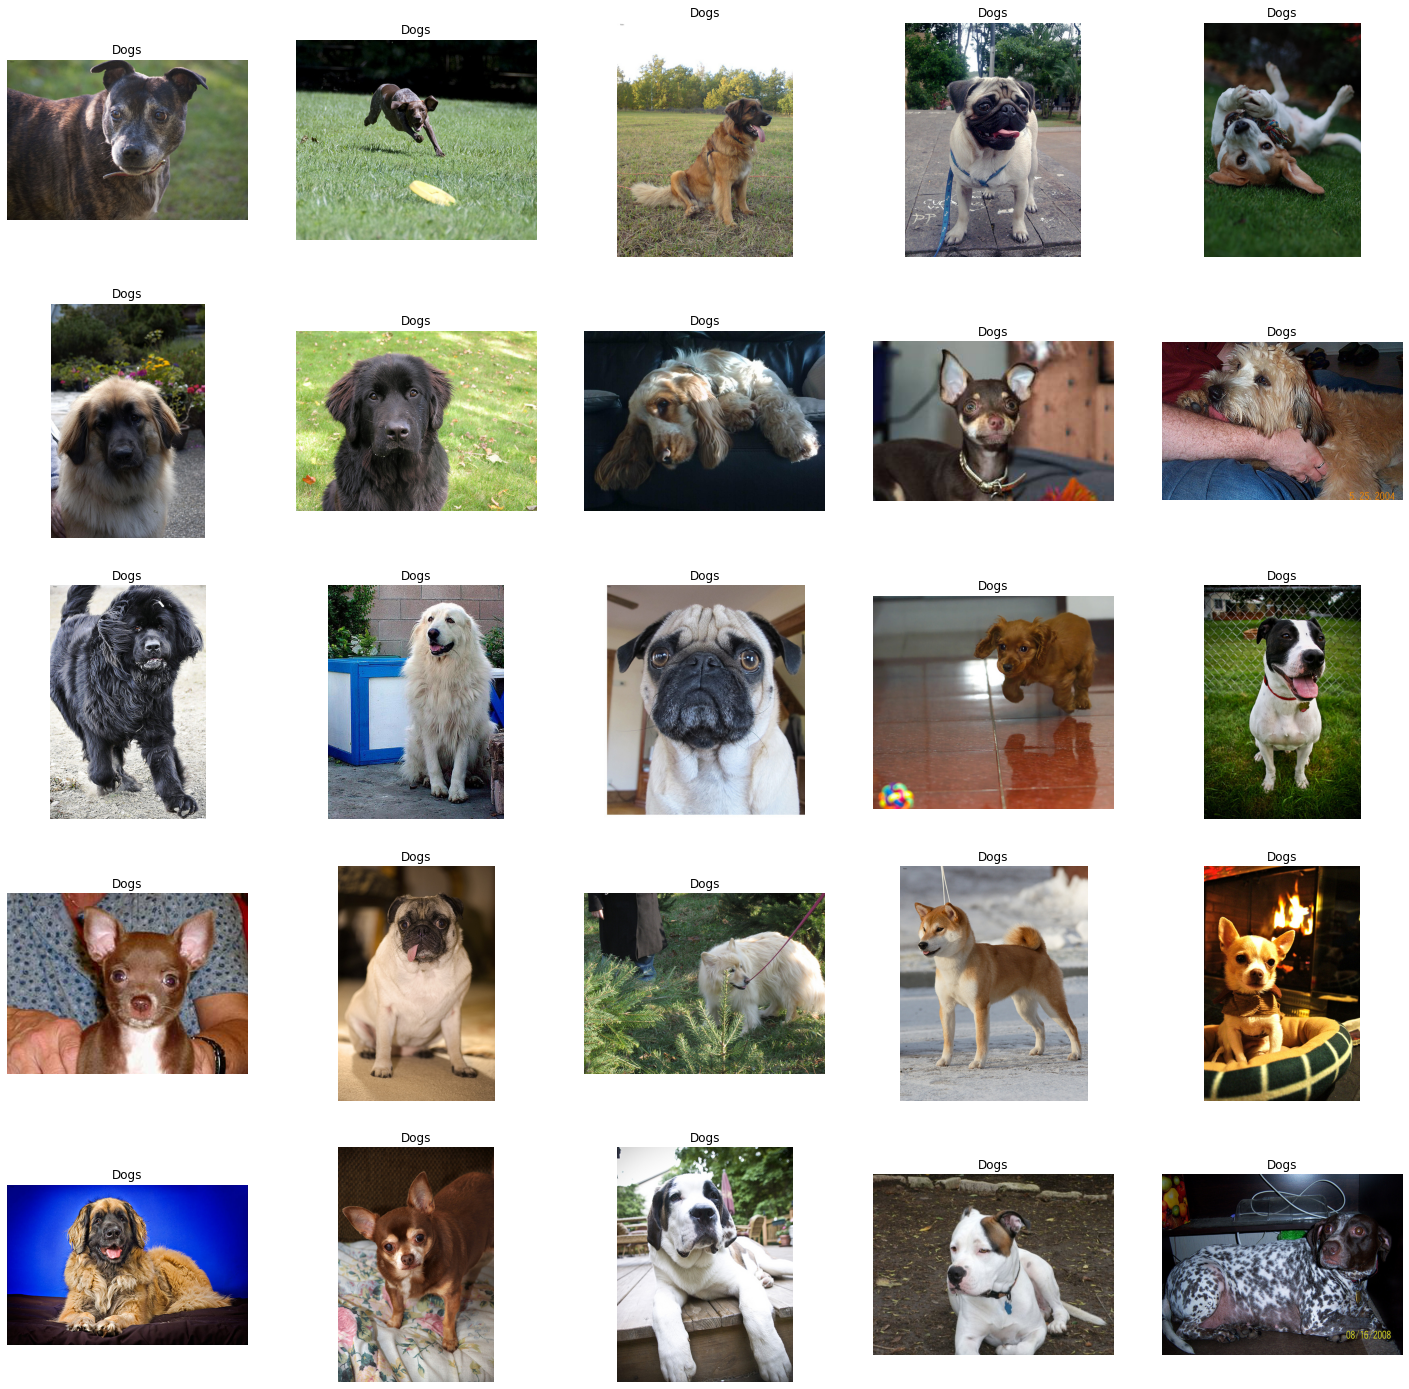

In [8]:
plt.figure(figsize=(25,25))  # 25 figuras

temp = df[df['label']==1]['images']  # selecionando as imagens de cachorro

start = random.randint(0, len(temp))  # plotando de forma aleatória
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cachorro')
  plt.axis('off')

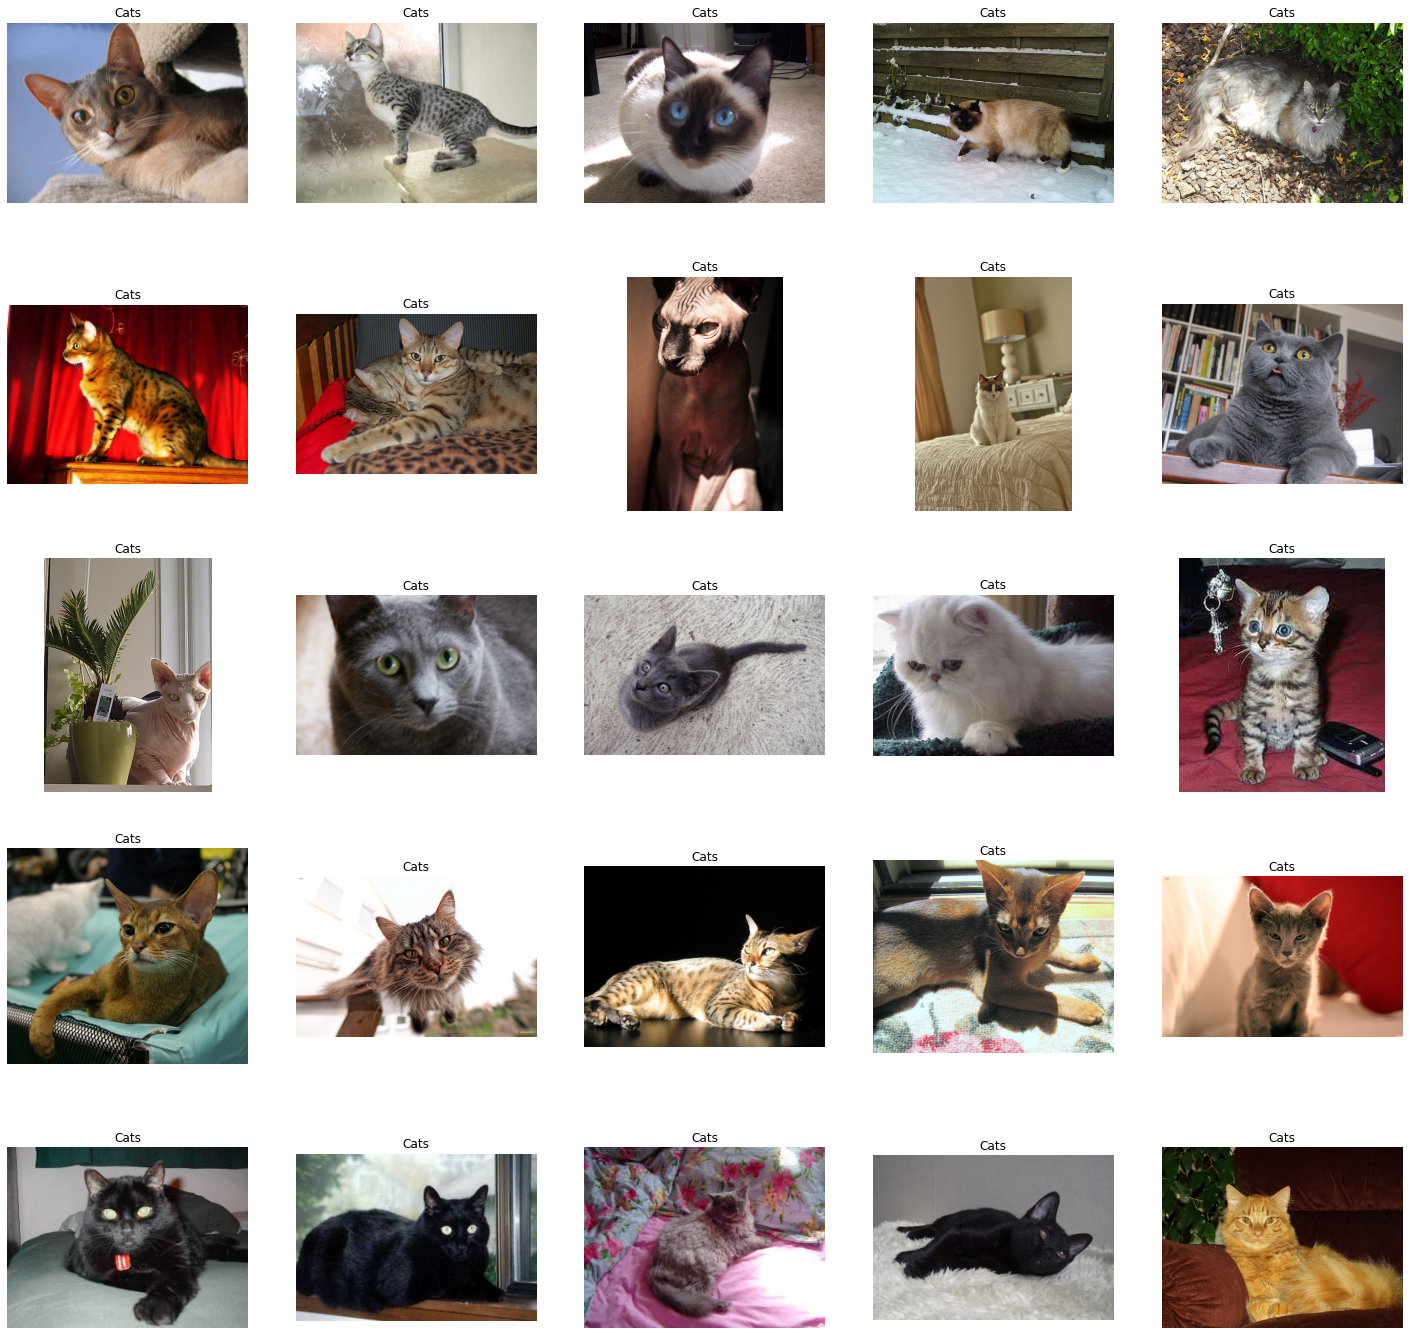

In [9]:
plt.figure(figsize=(25,25))  # 25 imagens plotadas

temp = df[df['label']==0]['images']  # todas as imagens relacionadas a gatos

start = random.randint(0, len(temp))  # separando 25 imagens aleatórias
files = temp[start:start+25]

for index, file in enumerate(files):  # plotando
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

Para termos uma noção da quantidade de dados de cachorros e gatos, foi plotado o seguinte gráfico. 

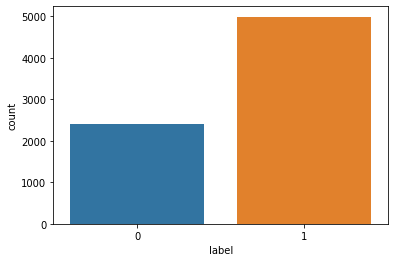

In [10]:
import seaborn as sns

sns.countplot(df['label'])

Mais a frente precisaremos fazer esa conversão para conseguirmos usar as labels no modelo. 

In [11]:
df['label'] = df['label'].astype('str') 

In [12]:
df.head()  # plotando só para conferir se está tudo certo

images label
0              /content/images/images/Persian_29.jpg     0
1             /content/images/images/keeshond_62.jpg     1
2               /content/images/images/Sphynx_77.jpg     0
3    /content/images/images/yorkshire_terrier_25.jpg     1
4  /content/images/images/miniature_pinscher_133.jpg     1

# **5. Separando dados de treino, validação e teste**

Agora, é necessário dividir as imagens do dataframe df que serão usadas no treino, na validação e nos testes.

Por isso, cria-se três variáveis para receber esses valores. Vale salientar que os arquivos com nome test, equivalem a validação.

Os arquivos de treino terão 80% de todas as imagens.
Os arquivos de validação terão 14% de todas as imagens.
Os arquivos de teste terão 6% de todas as imagens.


In [13]:
train,test,test_final = [],[],[]  # criando os arrays que receberão os valores

from sklearn.model_selection import train_test_split  # importando a função de split

# separa-se os arquivos de treino e validação 
train, test = train_test_split(df, test_size=0.20, random_state=42)

# separa-se os arquivos de validacao (test) e os de teste (test_final)
test, test_final = train_test_split(test, test_size=0.3, random_state=42)

print(train)  # fazemos um print para ver como ficou o formato
print((test))
print(test_final)

                                                 images label
6279      /content/images/images/english_setter_184.jpg     1
2251         /content/images/images/basset_hound_91.jpg     1
3149   /content/images/images/miniature_pinscher_64.jpg     1
6990             /content/images/images/havanese_99.jpg     1
3882              /content/images/images/Sphynx_127.jpg     0
...                                                 ...   ...
5191         /content/images/images/Egyptian_Mau_69.jpg     0
5226           /content/images/images/leonberger_92.jpg     1
5390  /content/images/images/american_pit_bull_terri...     1
860              /content/images/images/Ragdoll_118.jpg     0
7270            /content/images/images/shiba_inu_92.jpg     1

[5912 rows x 2 columns]
                                                 images label
2881             /content/images/images/Ragdoll_128.jpg     0
6686             /content/images/images/chihuahua_8.jpg     1
3477   /content/images/images/miniature_pinsc

In [14]:
test.head()

images label
2881            /content/images/images/Ragdoll_128.jpg     0
6686            /content/images/images/chihuahua_8.jpg     1
3477  /content/images/images/miniature_pinscher_35.jpg     1
5552   /content/images/images/British_Shorthair_32.jpg     0
6810               /content/images/images/boxer_61.jpg     1

# **6. Redes Nuerais Convolucionais**

Nesse momento, entraremos nas redes neurais convolucionais(CNN). Essa metodologia de matemática estruturará toda a análise do projeto em questão. 



Como temos um dataset com poucas imagens, é necessário que tenhamos um data augmentation. Que nada mais é do que fazer alguns processos na imagem dos arquivos de treino para que o meu set de treino "aumente" em quantidade. 

Ou seja, treinaremos meu modelo com duas fotos iguais, contendo diferenças no formado, na angulação, no zoom, no tamanho. Enfim, essa modelagem é utilizada para evitar o overfitting do meu modelo, caso que pode realmente acontecer aqui. 

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# fazndo um gerador de dados de treino
train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=128, 
    class_mode='binary'
)

# os dados de validação e teste não sofrem alteração. usamos apenas para rescalar
val_generator = ImageDataGenerator(rescale = 1./255)  # os meus dados de validação não sofrerão mudanças, nem os de teste. 
val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=128, 
    class_mode='binary'
)

# agora usamos o mesmo para teste, para fazermos as predições futuras
test_generator = ImageDataGenerator(rescale = 1./255)
test_iterator = test_generator.flow_from_dataframe(
    test_final, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=128, 
    class_mode='binary'
)

Found 5912 validated image filenames belonging to 2 classes.
Found 1034 validated image filenames belonging to 2 classes.
Found 444 validated image filenames belonging to 2 classes.


Agora criamos o nosso modelo. Esse é um tipo de convnet (convolutional network).
Nossa rede terão alguns parâmetros e eles podem mudar toda a modelagem da predição. É importante saber que é nele que fizemos algumas alterações e ajustes no modelo.

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.utils import shuffle


from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



Então compilamos o modelo

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

Por fim, implementamos os nossos dados obtidos durante todo o processo na rede convolucional.

Implementamos 50 épocas para que o nosso modelo consiga aprender cada vez mais. A acurácia foi crescendo com o tempo, tanto na validação quanto no treino. O valor do loss também foi decaindo com o tempo. 

Se implementássemos mais épocas, talvez o nosso modelo conseguisse valores de acurácias mais altos. Todavia, devido ao tempo longo de treino, preferimos setar esse valor.

In [18]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator)

Epoch 1/50
47/47 [==============================] - 65s 1s/step - loss: 0.6850 - accuracy: 0.6429 - val_loss: 0.6479 - val_accuracy: 0.6741
Epoch 2/50
47/47 [==============================] - 54s 1s/step - loss: 0.5916 - accuracy: 0.6861 - val_loss: 0.5954 - val_accuracy: 0.6789
Epoch 3/50
47/47 [==============================] - 54s 1s/step - loss: 0.5844 - accuracy: 0.6881 - val_loss: 0.5959 - val_accuracy: 0.6799
Epoch 4/50
47/47 [==============================] - 54s 1s/step - loss: 0.5679 - accuracy: 0.6952 - val_loss: 0.5753 - val_accuracy: 0.6954
Epoch 5/50
47/47 [==============================] - 53s 1s/step - loss: 0.5532 - accuracy: 0.7086 - val_loss: 0.5689 - val_accuracy: 0.7070
Epoch 6/50
47/47 [==============================] - 53s 1s/step - loss: 0.5469 - accuracy: 0.7157 - val_loss: 0.5523 - val_accuracy: 0.7157
Epoch 7/50
47/47 [==============================] - 53s 1s/step - loss: 0.5327 - accuracy: 0.7265 - val_loss: 0.5765 - val_accuracy: 0.7224
Epoch 8/50
47/47 [==

# **7. Avaliando os resultados**

Agora, avalia-se os dados de acurácia. Tanto na validação quanto no treino.

No gráfico, podemos perceber como os nossos dados procederam. 

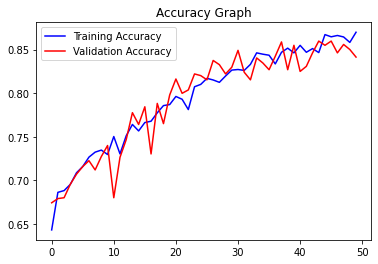

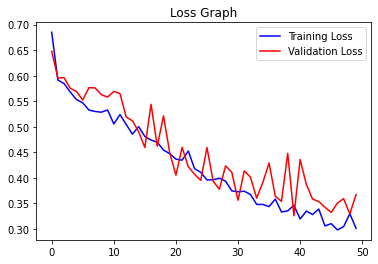

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

**Nas 50 épocas testadas no modelo, obteve-se uma acurácia de validação e de treino de 85%, que é um valor bastante positivo. Tendo em vista que não foi feito um processamento de imagem no dataset, 87% é considerado suficiente e eficaz. Por fim, é importante dizer que o nosso modelo não atingiu overfitting ou underfitting. Já que os dados de validação estavam crescendo de forma parecida.**

# **8. Conclusão**

**Ao final de tudo, comparando o modelo de CNN, com o de regressão logística, pode-se afirmar que um modelo usando CNN é bem mais eficaz.**

**Como melhoria para o modelo acima produzido, é possível implementar processamentos de imagem sobre o dataset para que ele identifique de forma mais apurada os gatos e cachorros.**

**Também é possível implementar uma rede convolucional pré treinada, isso fará com que a eficiência aumente bastante, devido a sua grande capacidade de extração de características.**

**O resultado obtido de 87% é bem positivo, visto que se aumentássemos o número de épocas, o nosso modelo alcançaria resultados melhores.**